In [10]:
import glob
import pandas as pd
import pickle

In [11]:
game_files = glob.glob('../data/complex_evaluation_thorough/*.pkl')

In [12]:
games = []
for game_file in game_files:
    with open(game_file, 'rb') as file:
        game = pickle.load(file)
        game['id'] = int(game_file.split('/')[-1].split('.')[0].split('_')[-1])
        games.append(game)

In [31]:
len(games)

50

In [13]:
games[2]

{'bet_history': [('Owen', 1, 'Small Blind', 'Pre-flop'),
  ('Jack', 2, 'Big Blind', 'Pre-flop'),
  ('Evan', 2, 'Call', 'Pre-flop'),
  ('Evan', 2, 'Call', 'Flop'),
  ('Owen', 2, 'Call', 'Flop'),
  ('Jack', 0, 'Fold', 'Flop'),
  ('Evan', 2, 'Call', 'Turn'),
  ('Owen', 2, 'Call', 'Turn'),
  ('Evan', 2, 'Call', 'River'),
  ('Owen', 2, 'Call', 'River')],
 'reasoning_history': [('Evan',
   'The hand 10 of Spades and Queen of Clubs has potential, especially considering the game is in the pre-flop stage and no community cards have been revealed yet. Calling the current bet of 2 chips is a reasonable move, as it matches the big blind and allows for the opportunity to see the flop without committing too many chips. The decision to call also takes into account the shallow stack size (10 chips), making it risky to play aggressively without a stronger hand or more information from community cards.',
   'Pre-flop',
   2,
   [],
   [('Owen', 1, 'Small Blind', 'Pre-flop'),
    ('Jack', 2, 'Big Blind',

In [14]:
games_with_winners = list(filter(lambda x: 'winner' in x.keys(), games))
winning_stats = list(map(lambda x: {'winner': x['winner'], 'winner_role': x['role'], 'model': x['winner_model'], 'winning_amount': x['winning_amount']}, games_with_winners))

In [15]:
len(winning_stats)

21

In [16]:
df_winning_stats = pd.DataFrame(winning_stats)

In [17]:
df_winning_stats.head()

,winner,winner_role,model,winning_amount
0,Jack,Big Blind,gpt-3.5-turbo-1106,15
1,Evan,Small Blind,gpt-4-turbo,17
2,Evan,Dealer,gpt-4-turbo,19
3,Jack,Small Blind,gpt-3.5-turbo-1106,9
4,Evan,Big Blind,gpt-4-turbo,15


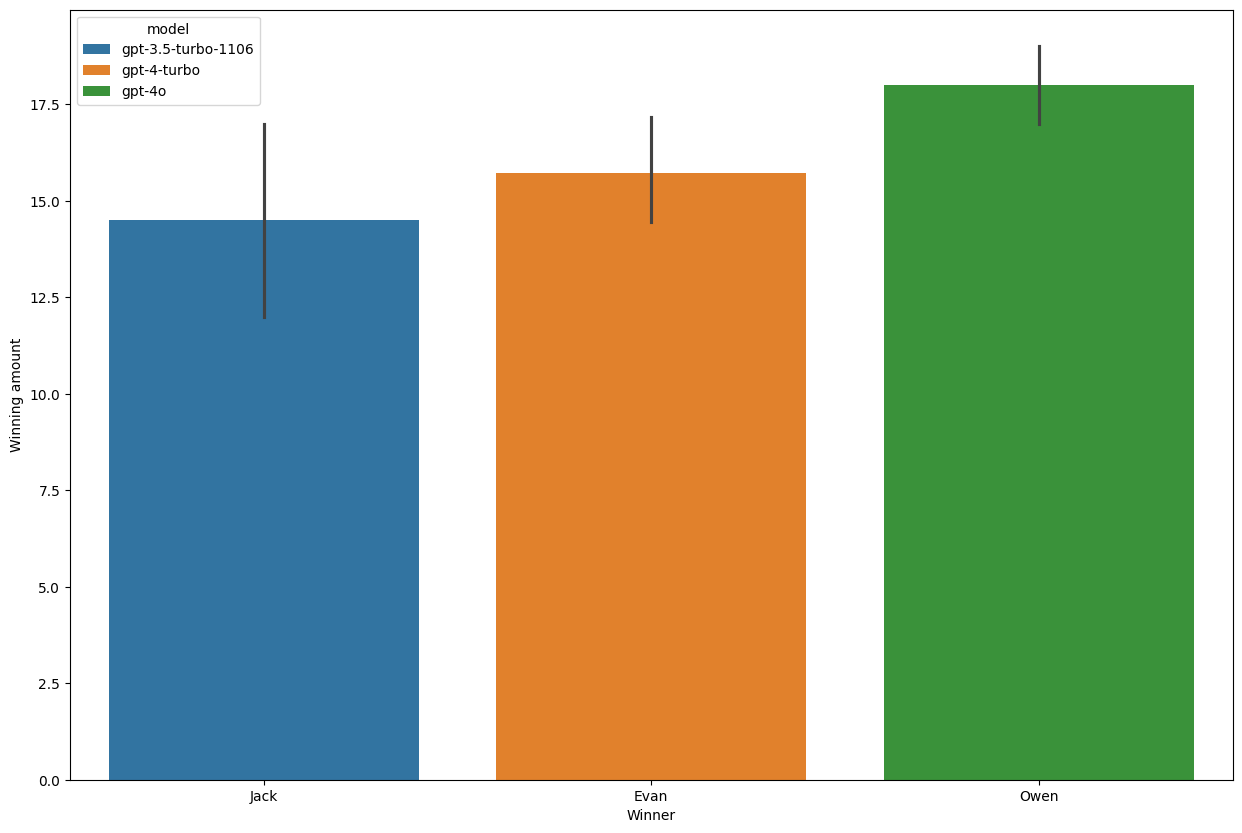

In [18]:
# plot the barchart of victories by model and winner name
import matplotlib.pyplot as plt
import seaborn as sns
# set the size of the plot
plt.figure(figsize=(15, 10))
# set the name of the x-axis
plt.xlabel('Winner')
# set the name of the y-axis
plt.ylabel('Winning amount')
sns.barplot(x='winner', y='winning_amount', hue='model', data=df_winning_stats);


In [19]:
# count the number of victories by model and winner name
df_winning_stats.groupby(['model', 'winner']).size()

model               winner
gpt-3.5-turbo-1106  Jack       8
gpt-4-turbo         Evan      11
gpt-4o              Owen       2
dtype: int64

In [20]:
# sum the winning amount by model and winner name
df_winning_stats.groupby(['model', 'winner']).sum()

/tmp/ipykernel_322176/1867170868.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_winning_stats.groupby(['model', 'winner']).sum()


,,winning_amount
model,winner,
gpt-3.5-turbo-1106,Jack,116
gpt-4-turbo,Evan,173
gpt-4o,Owen,36


In [21]:
# get the average winning amount by model and winner name
df_winning_stats.groupby(['model', 'winner']).mean()

/tmp/ipykernel_322176/736136457.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_winning_stats.groupby(['model', 'winner']).mean()


,,winning_amount
model,winner,
gpt-3.5-turbo-1106,Jack,14.500000
gpt-4-turbo,Evan,15.727273
gpt-4o,Owen,18.000000


In [22]:
# count the number of victories by role
df_winning_stats.groupby(['winner_role']).size()

winner_role
Big Blind      8
Dealer         7
Small Blind    6
dtype: int64

In [23]:
# sum the winning amount by role
df_winning_stats.groupby(['winner_role']).sum()

/tmp/ipykernel_322176/1299034.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_winning_stats.groupby(['winner_role']).sum()


,winning_amount
winner_role,
Big Blind,120
Dealer,123
Small Blind,82


In [25]:
games_with_errors = list(filter(lambda x: 'errors' in x.keys(), games))
df_games_with_errors = pd.DataFrame(games_with_errors)

In [26]:
df_games_with_errors.head()

,bet_history,reasoning_history,errors,winner,role,winner_model,winning_amount,id
0,"[(Evan, 1, Small Blind, Pre-flop), (Jack, 2, B...","[(Owen, With a Jack and a 4 of clubs, my hand ...","[Jack doesn't have enough chips to bet 10., Ja...",Jack,Big Blind,gpt-3.5-turbo-1106,15,29
1,"[(Jack, 1, Small Blind, Pre-flop), (Owen, 2, B...","[(Evan, Given that the hand 5 of Spades and 9 ...","[Jack doesn't have enough chips to bet 9., Jac...",Jack,Small Blind,gpt-3.5-turbo-1106,9,43
2,"[(Owen, 1, Small Blind, Pre-flop), (Jack, 2, B...","[(Evan, Holding a King of Clubs and Ace of Spa...","[Evan doesn't have enough chips to bet 12., Ja...",Jack,Big Blind,gpt-3.5-turbo-1106,9,20
3,"[(Evan, 1, Small Blind, Pre-flop), (Jack, 2, B...","[(Owen, With a Queen and a Ten, I have a reaso...","[Jack doesn't have enough chips to bet 10., Ja...",Jack,Big Blind,gpt-3.5-turbo-1106,13,6


In [27]:
errors_concatenated = df_games_with_errors['errors'].apply(pd.Series).stack().reset_index(drop=True)

In [28]:
error_names = list(map(lambda x: x.split()[0], errors_concatenated))

In [29]:
# count the number of errors by error name
errors_count = pd.Series(error_names).value_counts()

In [30]:
errors_count

Jack    8
Evan    1
dtype: int64